<a href="https://colab.research.google.com/github/PrinceSudipto21/Stock-price-prediction-using-LSTM/blob/master/predictions_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
import yfinance as yf

In [6]:
#Get the stock quote
df = yf.download('GOOG', start='2012-01-02', end = '2021-12-17')
#show data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981
...,...,...,...,...,...,...
2021-12-10,149.100006,149.399994,147.357498,148.675003,148.506012,21634000
2021-12-13,148.444000,148.562500,146.360001,146.704498,146.537750,24104000
2021-12-14,144.770004,145.442001,142.242493,144.970505,144.805725,24778000


In [7]:
#get the numbers of rows and columns in the data set
print(df.shape)

(2507, 6)


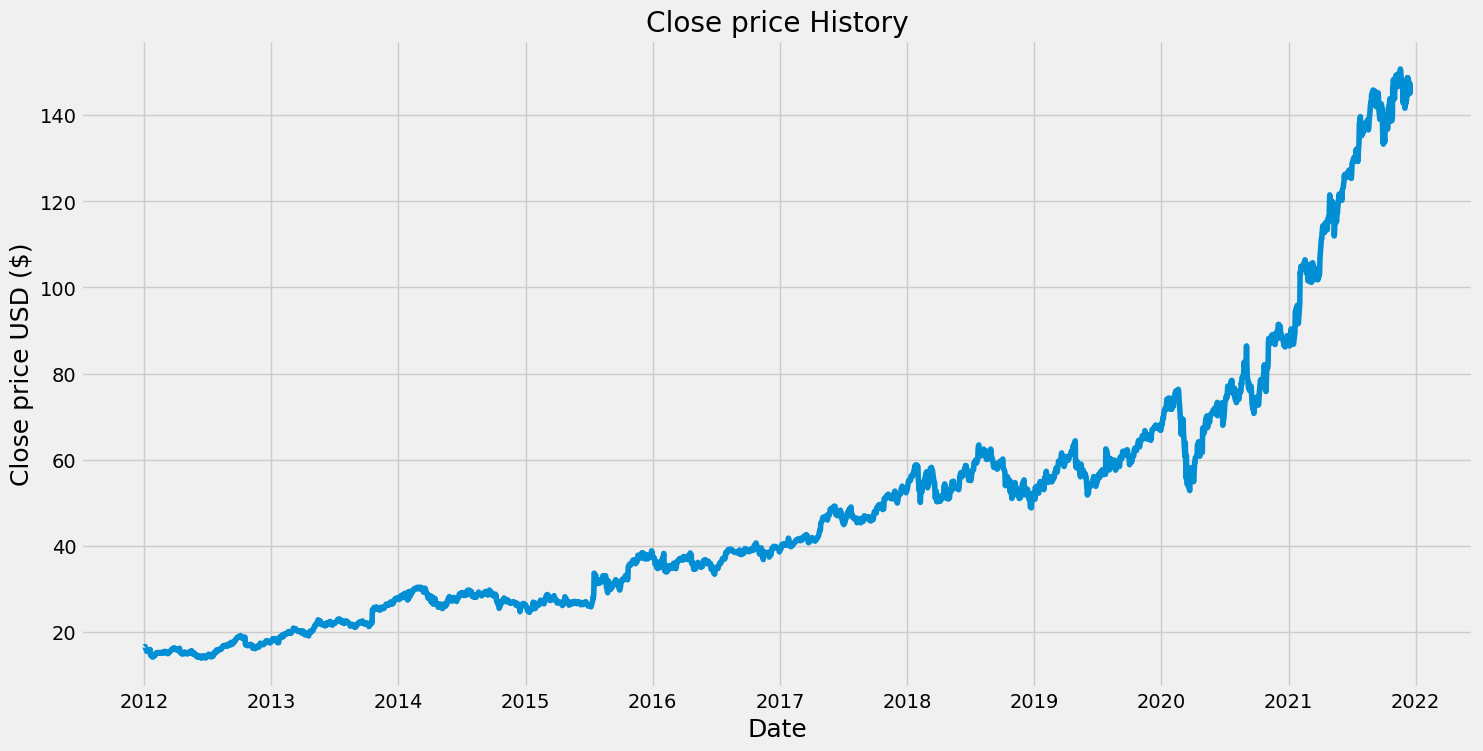

In [8]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price USD ($)', fontsize = 18)
plt.show()

In [9]:
#create a new dataframe with only the 'Close column
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
print(training_data_len)

2006


In [10]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.01936668]
 [0.01988927]
 [0.01820133]
 ...
 [0.95804732]
 [0.97557845]
 [0.95708227]]


In [11]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]

#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01936668, 0.01988927, 0.01820133, 0.01656439, 0.01154608,
       0.0116699 , 0.01218339, 0.01285346, 0.01200676, 0.01266045,
       0.01344889, 0.01466158, 0.0049054 , 0.00481982, 0.00398405,
       0.00190098, 0.00164788, 0.00381107, 0.00339409, 0.00383474,
       0.00396584, 0.00474516, 0.00678818, 0.0091116 , 0.00868915,
       0.00924998, 0.00954313, 0.00853256, 0.00967788, 0.00923359,
       0.00846883, 0.00864363, 0.00830131, 0.01000563, 0.00890219,
       0.00856898, 0.00925908, 0.00915165, 0.01080499, 0.01077951,
       0.01153516, 0.01132576, 0.01005116, 0.00835958, 0.00869461,
       0.00875653, 0.00750196, 0.00839417, 0.01069392, 0.01036799,
       0.01130392, 0.01201587, 0.01364372, 0.01355449, 0.01473623,
       0.01584149, 0.01521148, 0.01643874, 0.01601812, 0.01760955])]
[0.01627122404731983]

[array([0.01936668, 0.01988927, 0.01820133, 0.01656439, 0.01154608,
       0.0116699 , 0.01218339, 0.01285346, 0.01200676, 0.01266045,
       0.01344889, 0.01466158, 0.00

In [12]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1946, 60, 1)


In [14]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1946/1946 ━━━━━━━━━━━━━━━━━━━━ 55s 26ms/step - loss: 8.4499e-04


In [17]:
#Create the testing data set
#Create a new array containing scaled valus from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [18]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [19]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
#get the models prdicted price values
predictions = model.predict(x_test)
predictions= scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [21]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)

2.2014182237331976


<ipython-input-22-0c21c2de55e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


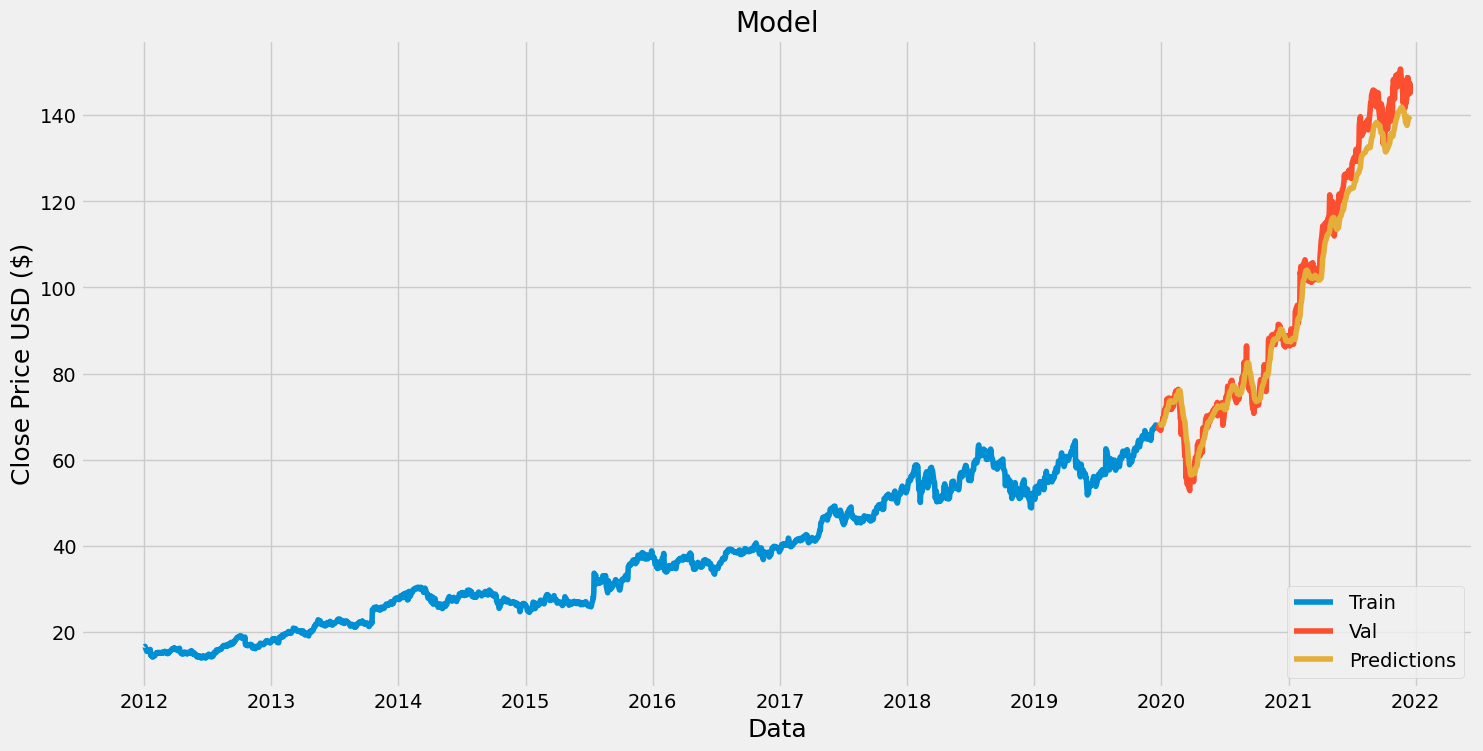

In [22]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [23]:
#show the valid and predicted prices
print(valid)

                 Close  Predictions
Date                               
2019-12-23   67.442001    68.111748
2019-12-24   67.178001    68.137146
2019-12-26   68.019997    68.116692
2019-12-27   67.594498    68.155014
2019-12-30   66.806999    68.177071
...                ...          ...
2021-12-10  148.675003   138.910660
2021-12-13  146.704498   139.443893
2021-12-14  144.970505   139.738480
2021-12-15  147.368500   139.741333
2021-12-16  144.838501   139.838928

[501 rows x 2 columns]


In [25]:
#get the quote
google_quote = yf.download('GOOG', start = '2002-01-01', end = '2022-11-01')
#create a new dataframe
new_df = google_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 qnd 1
last_60_days_scaled = scaler.transform(last_60_days)
#create the empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[97.77439]]


In [30]:
google_quote2 = yf.download('GOOG', period = '1d', start = '2023-11-02', end = '2024-06-02')
print(google_quote2['Close'])

[*********************100%***********************]  1 of 1 completed

Date
2023-11-02    128.580002
2023-11-03    130.369995
2023-11-06    131.449997
2023-11-07    132.399994
2023-11-08    133.259995
                 ...    
2024-05-24    176.330002
2024-05-28    178.020004
2024-05-29    177.399994
2024-05-30    173.559998
2024-05-31    173.960007
Name: Close, Length: 145, dtype: float64
